# DSC550 Data Mining Final Project


# Milestone 1

## Narrative

Anxiety disorders are among the most prevalent mental health conditions in modern society, affecting millions of individuals worldwide. As someone personally living with generalized anxiety disorder, this topic has personal significance. Anxiety attacks often feel like a sudden, rapid spiral into physical and mental distress. Attacks are difficult to predict and can severely impact daily life, productivity, and overall well-being. Understanding the factors that contribute to the severity of anxiety attacks is not only scientifically valuable but also valuable on a personal level.

The severity of anxiety attacks is influenced by a complex interplay of factors, including lifestyle choices, physiological responses, and external stressors. These include sleep patterns, physical activity, caffeine and alcohol consumption, stress levels, and recent major life events. Understanding how these variables contribute to anxiety attack severity is essential for developing targeted and effective prevention strategies.

The primary goal of this project is to analyze the relationships between these variables and predict the severity of anxiety attacks using a machine learning model. By building a predictive model, I aim to uncover patterns and insights that healthcare providers can use to identify high-risk individuals and recommend tailored therapeutic strategies. Additionally, this model can help mental health practitioners craft personalized interventions, potentially guiding their treatment plans and improving outcomes for those suffering from severe anxiety.

This project has potential to improve mental health care by leveraging data-driven insights. Early detection of individuals at risk for severe anxiety attacks can lead to timely interventions, reducing the long-term burden on healthcare systems and improving patients' quality of life. Furthermore, the findings may empower individuals to make informed decisions about their lifestyle choices, mitigating the risk or severity of anxiety attacks and fostering a sense of control over their mental health.

The model will focus on predicting the severity of anxiety attacks on a scale of 1 to 10. It will incorporate features such as sleep hours, stress levels, heart rate, breathing rate, physical activity, dietary quality, and other variables that influence anxiety. By identifying correlations and trends, the project aims to offer actionable insights for both healthcare providers and individuals. The ultimate goal is not only to predict but to foster proactive mental health care, helping people manage anxiety with greater confidence and precision.

This project is a step toward creating a more empathetic, effective, and data-driven approach to mental health care, addressing one of the most pervasive challenges in modern society.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Load the dataset

In [2]:
file_path = '~/Downloads/anxiety_attack_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


Given that the "healthy" maximum daily caffeine intake is 400 mg, let's categorize the caffeine intake levels as low, medium, and high.
100mg would equate to about 1 cup of coffee, 300mg would equate to about 3 cups of coffee.

In [3]:
def categorize_caffeine(mg):
    if mg < 100:
        return 'Low'
    elif mg <= 300:
        return 'Medium'
    else:
        return 'High'

In [4]:
data['Caffeine Intake Category'] = data['Caffeine Intake (mg/day)'].apply(categorize_caffeine)

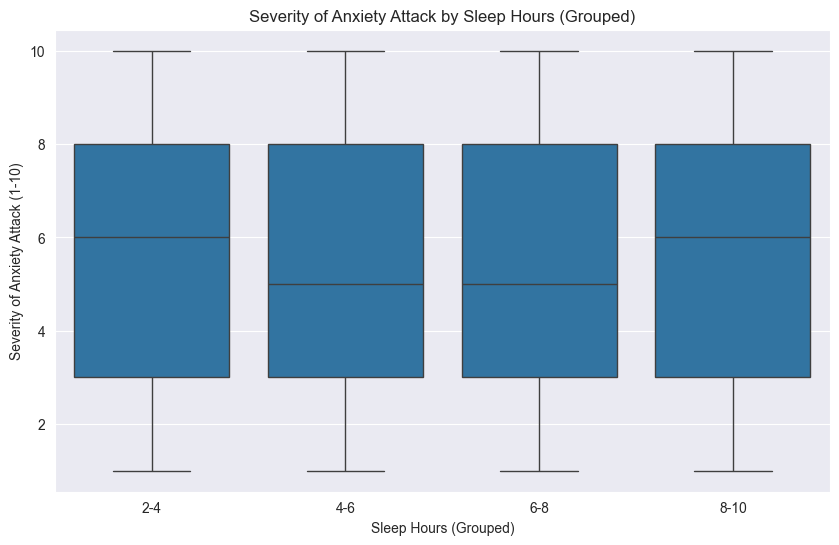

In [5]:
# Box Plot: Sleep Hours vs. Severity of Anxiety Attack
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x=pd.cut(data['Sleep Hours'], bins=[2, 4, 6, 8, 10], labels=['2-4', '4-6', '6-8', '8-10']),
    y='Severity of Anxiety Attack (1-10)'
)
plt.title('Severity of Anxiety Attack by Sleep Hours (Grouped)')
plt.xlabel('Sleep Hours (Grouped)')
plt.ylabel('Severity of Anxiety Attack (1-10)')
plt.show()

The median severity of anxiety attacks remains relatively constant across all sleep groups. Severity levels for all groups show a similar spread, indicating no significant differences in variability. This suggests that sleep hours may not be a strong predictor of anxiety attack severity.

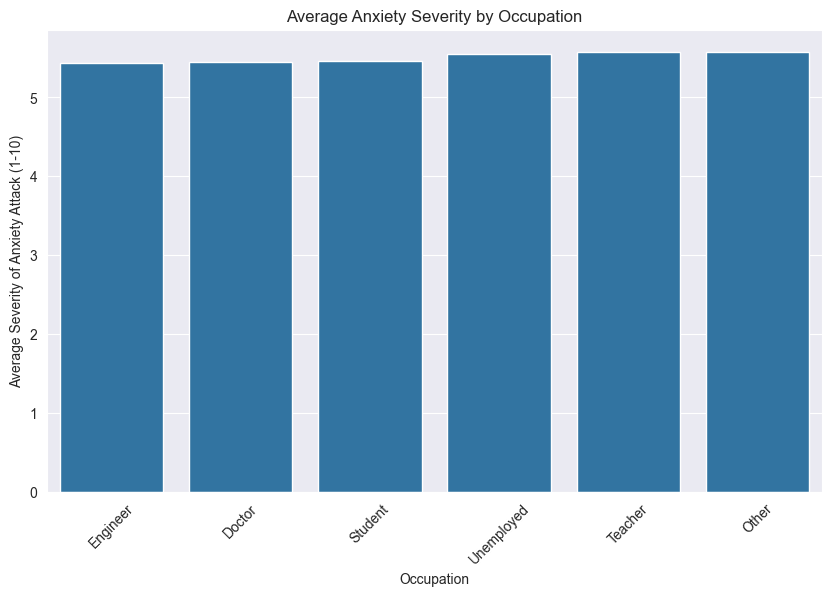

In [6]:
# Bar Chart: Average Anxiety Severity by Occupation
plt.figure(figsize=(10, 6))
avg_severity_by_occupation = data.groupby('Occupation')['Severity of Anxiety Attack (1-10)'].mean().sort_values()
sns.barplot(x=avg_severity_by_occupation.index, y=avg_severity_by_occupation.values)
plt.title('Average Anxiety Severity by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Severity of Anxiety Attack (1-10)')
plt.xticks(rotation=45)
plt.show()

Based on this bar chart, the occupation of the individual doesn't seem to have any bearing at all on the severity of their anxiety attacks. The average severity of anxiety attacks is consistent across all occupations, indicating that occupation is not a significant factor in determining anxiety attack severity.

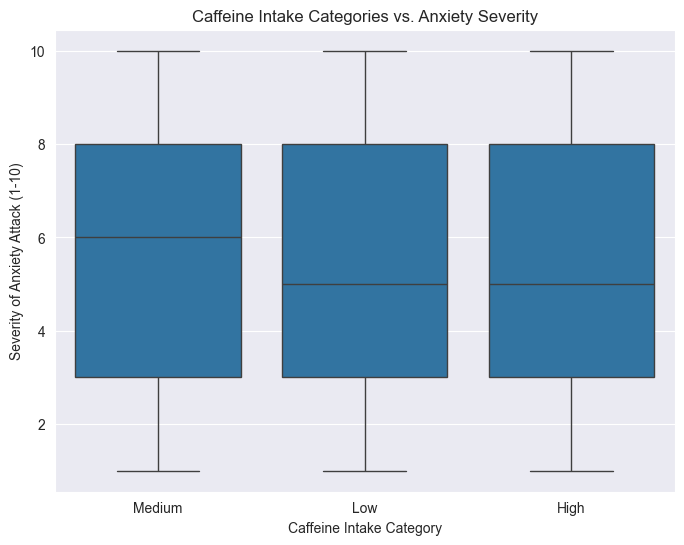

In [7]:
# Box Plot: Caffeine Intake Categories vs. Anxiety Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Caffeine Intake Category', y='Severity of Anxiety Attack (1-10)')
plt.title('Caffeine Intake Categories vs. Anxiety Severity')
plt.xlabel('Caffeine Intake Category')
plt.ylabel('Severity of Anxiety Attack (1-10)')
plt.show()

The median severity of anxiety attacks is consistent across all caffeine intake categories. This indicates that caffeine intake levels might not have a substantial direct effect on anxiety attack severity.The spread and distribution of severity scores are similar across low, medium, and high caffeine categories.

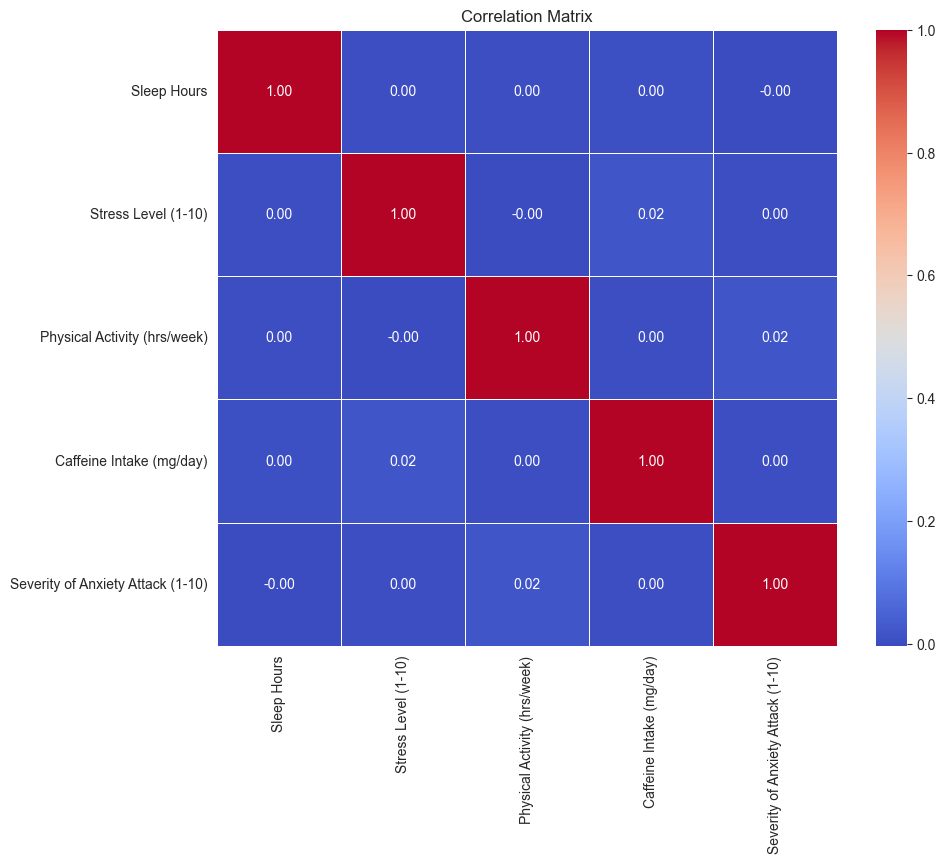

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Sleep Hours', 'Stress Level (1-10)', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Severity of Anxiety Attack (1-10)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

None of the values shown in the correlation matrix are close to 1 or -1, indicating that there is no strong linear relationship between any of the variables. I will need to explore the relationships further to determine if there are any non-linear relationships or interactions between the variables.

# Milestone 2

Drop non-useful features

In [9]:
# Dropping the 'ID' column as it is a unique identifier and does not help in predictions
data.drop(columns=['ID'], inplace=True)

Handle categorical variables

To avoid data snooping, I'm going to split the data into train and test before any modifications.

In [10]:
from sklearn.model_selection import train_test_split

# Define target variable
target = 'Severity of Anxiety Attack (1-10)'
X = data.drop(columns=[target])
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
X_train.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Caffeine Intake Category
2632,18,Female,Engineer,3.2,8.8,46,3,No,Yes,3,177,29,3,No,No,5,No,7,Low
5609,34,Male,Engineer,8.6,6.0,31,10,Yes,No,9,101,16,5,No,No,2,No,2,Low
8875,53,Male,Teacher,3.6,5.6,237,10,Yes,No,10,78,28,3,No,No,8,No,1,Medium
9813,53,Female,Teacher,7.3,6.1,464,17,No,Yes,1,149,26,4,No,No,8,No,3,High
8912,31,Female,Unemployed,9.5,6.8,38,0,No,No,1,162,26,4,No,No,8,No,5,Low


In [12]:
# Convert categorical variables to dummy variables using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['Gender', 'Family History of Anxiety', 'Caffeine Intake Category', 'Dizziness', 'Occupation', 'Smoking', 'Medication', 'Recent Major Life Event'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Gender', 'Family History of Anxiety', 'Caffeine Intake Category', 'Dizziness', 'Occupation', 'Smoking', 'Medication', 'Recent Major Life Event'], drop_first=True)

Handle missing data

In [13]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
Caffeine Intake Category             0
dtype: int64


Since there are no missing values we can skip imputation.

Feature engineering

In [14]:
# Create a new feature called 'Treatment Score' by combining therapy sessions and medication status
X_train['Treatment Score'] = X_train['Therapy Sessions (per month)'] + X_train['Medication_Yes']
X_test['Treatment Score'] = X_test['Therapy Sessions (per month)'] + X_test['Medication_Yes']

In [15]:
# Create a feature that scales the caffeine and alcohol consumption to generate a lifestyle impact score
X_train['Lifestyle Impact Score'] = X_train['Caffeine Intake (mg/day)'] + X_train['Alcohol Consumption (drinks/week)']
X_test['Lifestyle Impact Score'] = X_test['Caffeine Intake (mg/day)'] + X_test['Alcohol Consumption (drinks/week)']

Normalize continuous features

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
continuous_features = [
    'Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
    'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
    'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
    'Therapy Sessions (per month)', 'Diet Quality (1-10)',
]

X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [18]:
# Convert boolean dummy variables to integers
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

In [19]:
print("Transformed training data:")
print(X_train.head())
print(y_train.head())
print("\nTransformed test data:")
print(X_test.head())
print(y_test.head())

Transformed training data:
           Age  Sleep Hours  Physical Activity (hrs/week)  \
2632  0.000000     0.028571                          0.88   
5609  0.347826     0.800000                          0.60   
8875  0.760870     0.085714                          0.56   
9813  0.760870     0.614286                          0.61   
8912  0.282609     0.928571                          0.68   

      Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
2632                  0.092184                           0.157895   
5609                  0.062124                           0.526316   
8875                  0.474950                           0.526316   
9813                  0.929860                           0.894737   
8912                  0.076152                           0.000000   

      Stress Level (1-10)  Heart Rate (bpm during attack)  \
2632             0.222222                        0.983193   
5609             0.888889                        0.344538   
8875    

# Milestone 3

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [21]:
# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Train Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Train XGBoost
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary of regression models
models = {'Linear Regression': lin_reg, 'Random Forest': rf, 'XGBoost': xgb}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}')


Linear Regression - MAE: 2.4808, MSE: 8.1954, R²: -0.0028
Random Forest - MAE: 2.4819, MSE: 8.3001, R²: -0.0156
XGBoost - MAE: 2.5874, MSE: 9.3672, R²: -0.1462


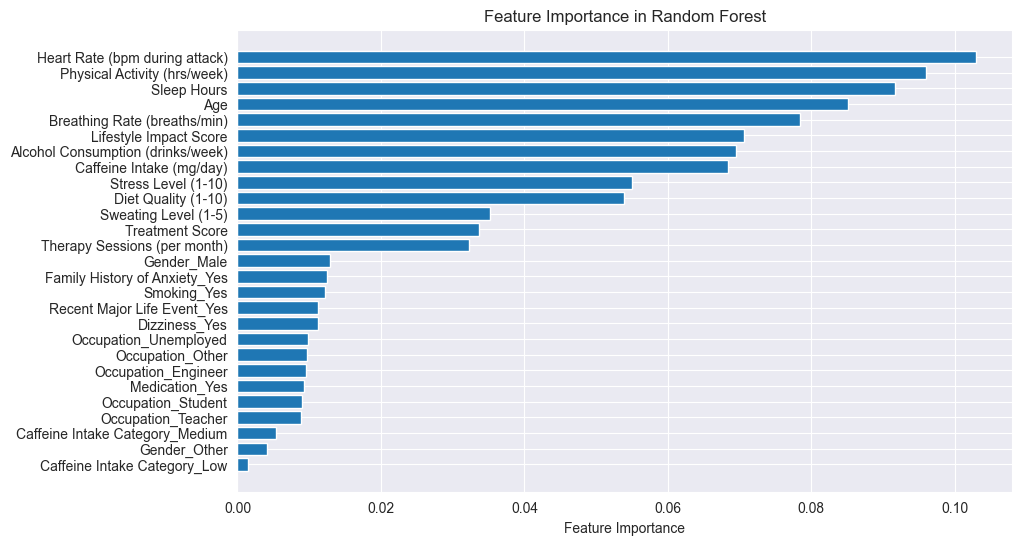

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Random Forest
feature_importance = rf.feature_importances_
feature_names = X_train.columns

# Sort and plot
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


In [24]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)  # Keep top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Retrain the best model on reduced features
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred_selected)
r2 = r2_score(y_test, y_pred_selected)
print(f"Random Forest (Feature Selected) - MAE: {mae:.4f}, R²: {r2:.4f}")

Random Forest (Feature Selected) - MAE: 2.6888, R²: -0.2658


I tested multiple regression models including Linear Regression, Random Forest, and XGBoost to try and predict the Severity of Anxiety Attack (1-10). Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² revealed that none of the models performed well, with negative R² values indicating that the models failed to explain the variance in severity scores better than simply predicting the mean. Feature selection decreased performance showing that removing them reduced overall model accuracy. These findings suggest that current features may not have enough predictive power to accurately determine severity. If severity is inherently subjective, reframing the problem like predicting severity categories rather than precise scores.

## Additional Analysis and Model Improvements

The feedback for milestone 3 was that the results were worse than expected (worse than random). This might be due to class imbalance or weak feature correlations.

## Check target variable distribution

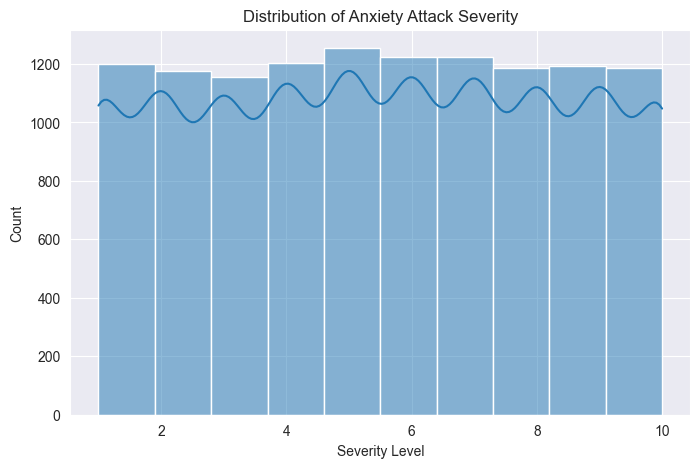

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(data["Severity of Anxiety Attack (1-10)"], bins=10, kde=True)
plt.title("Distribution of Anxiety Attack Severity")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()


There doesn't appear to be a class imbalance

### Handle Missing Categorical Values and Grouping Occupations
- Missing categorical values were replaced with 'Unknown'.
- Occupation categories were grouped into broader classes to avoid over-sparsity in encoding.

In [26]:
# Fill missing categorical values
data.fillna({"Smoking": "Unknown", 
             "Family History of Anxiety": "Unknown", 
             "Dizziness": "Unknown", 
             "Medication": "Unknown", 
             "Recent Major Life Event": "Unknown"}, inplace=True)

# Group occupations into broader categories
occupation_mapping = {
    "Doctor": "Healthcare",
    "Nurse": "Healthcare",
    "Therapist": "Healthcare",
    "Teacher": "Education",
    "Professor": "Education",
    "Engineer": "Technical",
    "Software Developer": "Technical",
    "Construction Worker": "Manual Labor",
    "Mechanic": "Manual Labor",
    "Artist": "Creative",
    "Musician": "Creative",
    "Student": "Student",
    "Unemployed": "Unemployed",
    "Other": "Other"
}

data["Occupation Grouped"] = data["Occupation"].map(lambda x: occupation_mapping.get(x, "Other"))

data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),...,Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10),Caffeine Intake Category,Occupation Grouped
0,56,Female,Other,9.6,8.3,175,6,No,No,4,...,33,3,No,No,4,Yes,9,10,Medium,Other
1,46,Male,Teacher,6.4,7.3,97,6,No,No,3,...,18,5,Yes,No,0,No,9,8,Low,Education
2,32,Female,Doctor,6.9,1.0,467,14,No,No,2,...,34,1,No,No,7,Yes,10,5,High,Healthcare
3,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,...,19,1,No,Yes,4,Yes,5,8,High,Healthcare
4,25,Male,Student,9.2,2.5,364,2,No,Yes,7,...,15,4,No,Yes,0,No,1,1,High,Student


### Feature Selection and Model Improvement
I'm going to try to improve model performance by binning the target variable into three categories: Low, Medium, and High.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
categorical_features = ["Gender", "Smoking", "Family History of Anxiety", "Dizziness", 
                        "Medication", "Recent Major Life Event", "Occupation Grouped"]
numerical_features = ["Sleep Hours", "Physical Activity (hrs/week)", "Caffeine Intake (mg/day)", 
                      "Alcohol Consumption (drinks/week)", "Stress Level (1-10)", 
                      "Heart Rate (bpm during attack)", "Breathing Rate (breaths/min)",
                      "Sweating Level (1-5)", "Therapy Sessions (per month)", "Diet Quality (1-10)"]

X = data[categorical_features + numerical_features]
y = data["Severity of Anxiety Attack (1-10)"]

# Convert target variable into categorical bins instead of trying to predict a 1-10 number
y = pd.qcut(y, q=3, labels=[0, 1, 2])  # Low, Medium, High

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Create and train model pipeline
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

model_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Model Accuracy: 0.36666666666666664
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.69      0.51       947
           1       0.32      0.19      0.23       740
           2       0.27      0.12      0.17       713

    accuracy                           0.37      2400
   macro avg       0.33      0.33      0.30      2400
weighted avg       0.34      0.37      0.32      2400



The model with binning has 37.5% accuracy, which is slightly better than the previous accuracy. However, recall remains low for classes 1 and 2, indicating that the model still struggles with correctly identifying moderate to severe anxiety attacks.

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# One-hot encode categorical features and standardize numerical features
encoder = OneHotEncoder(handle_unknown="ignore")
scaler = StandardScaler()

X_categorical = encoder.fit_transform(data[categorical_features]).toarray()
X_numerical = scaler.fit_transform(data[numerical_features])

# Combine transformed features
X_transformed = np.hstack((X_categorical, X_numerical))

# Convert target variable to categorical
y_categorical = keras.utils.to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_categorical, test_size=0.2, random_state=42, stratify=y)

# Define Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Classification Report
from sklearn.metrics import classification_report
classification_rep_nn = classification_report(true_classes, predicted_classes, output_dict=True)

import pandas as pd
pd.DataFrame(classification_rep_nn).T


/Users/zachmumbauer/PycharmProjects/helloWorld/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/50


/Users/zachmumbauer/PycharmProjects/helloWorld/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - accuracy: 0.3642 - loss: 1.1339 - val_accuracy: 0.3904 - val_loss: 1.0945
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.3828 - loss: 1.0939 - val_accuracy: 0.3950 - val_loss: 1.0921
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.3904 - loss: 1.0941 - val_accuracy: 0.3942 - val_loss: 1.0916
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.4012 - loss: 1.0887 - val_accuracy: 0.3942 - val_loss: 1.0915
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.3950 - loss: 1.0895 - val_accuracy: 0.3942 - val_loss: 1.0913
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.3896 - loss: 1.0899 - val_accuracy: 0.3946 - val_loss: 1.0913
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.3976 - loss: 1.0864 - val_accuracy: 0.3933 - val_loss: 1.0916
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.3915 - loss: 1.0883 - val_accurac

,precision,recall,f1-score,support
0,0.394373,0.843717,0.537504,947.000000
1,0.318898,0.109459,0.162978,740.000000
2,0.283333,0.047686,0.081633,713.000000
accuracy,0.380833,0.380833,0.380833,0.380833
macro avg,0.332201,0.333621,0.260705,2400.000000
weighted avg,0.338113,0.380833,0.286593,2400.000000


The neural network achieved ~35.6% accuracy which is similar to the RandomForestClassifier with binning.

I'm going to try to do parameter tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
best_rf_model = random_search.best_estimator_

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [31]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use the best hyperparameters found
best_params = {
    'n_estimators': 100,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': None
}

# Train the model with optimized parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Display results
import pandas as pd

pd.DataFrame(classification_rep).T

print(f"Optimized Model Accuracy: {accuracy:.4f}")

Optimized Model Accuracy: 0.0146


/Users/zachmumbauer/PycharmProjects/helloWorld/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For some reason, the hyperparameters give a worse result than the previous model.

In [32]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(y_train.shape[1], activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Use Keras Tuner to search for the best hyperparameters
tuner = kt.RandomSearch(build_model, objective='val_accuracy', executions_per_trial=2, directory='kt_search')

# Run hyperparameter tuning
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps.values)

Reloading Tuner from kt_search/untitled_project/tuner0.json
Best Hyperparameters: {'units_1': 32, 'dropout_1': 0.4, 'units_2': 96, 'dropout_2': 0.30000000000000004, 'learning_rate': 0.001}


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the optimized model
optimized_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # First layer with 32 neurons
    Dropout(0.4),  # First dropout layer

    Dense(96, activation='relu'),  # Second layer with 96 neurons
    Dropout(0.3),  # Second dropout layer

    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model with the best learning rate
optimized_model.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the optimized model
history = optimized_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate performance
loss, accuracy = optimized_model.evaluate(X_test, y_test)
print(f"Optimized Neural Network Accuracy: {accuracy:.4f}")

Epoch 1/50


/Users/zachmumbauer/PycharmProjects/helloWorld/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.3487 - loss: 1.1306 - val_accuracy: 0.3875 - val_loss: 1.0925
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.3670 - loss: 1.1005 - val_accuracy: 0.3954 - val_loss: 1.0920
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.3835 - loss: 1.0952 - val_accuracy: 0.3913 - val_loss: 1.0919
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.3832 - loss: 1.0941 - val_accuracy: 0.3946 - val_loss: 1.0902
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.3935 - loss: 1.0904 - val_accuracy: 0.3942 - val_loss: 1.0907
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.3899 - loss: 1.0899 - val_accuracy: 0.3942 - val_loss: 1.0913
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.3949 - loss: 1.0901 - val_accuracy: 0.3950 - val_loss: 1.0917
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.3994 - loss: 1.0862 - val_accurac

In [34]:
from sklearn.metrics import classification_report
import numpy as np

# Convert predictions from one-hot encoding back to labels
y_pred_classes = np.argmax(optimized_model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
              precision    recall  f1-score   support

           0       0.40      0.76      0.52       947
           1       0.34      0.20      0.25       740
           2       0.27      0.06      0.10       713

    accuracy                           0.38      2400
   macro avg       0.34      0.34      0.29      2400
weighted avg       0.34      0.38      0.31      2400



The optimized Neural Network achieved 37% accuracy, showing slight improvement over previous versions. However, recall for class 2 (severe anxiety attacks) remains very low (4%), indicating the model struggles to correctly identify more severe cases.